In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
import json
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm

In [35]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(X_features, n_cluster, weight): 

    clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
    cluster_labels = clusterer.fit_predict(X_features, sample_weight=weight)

    sil_avg = silhouette_score(X_features, cluster_labels)
    sil_values = silhouette_samples(X_features, cluster_labels)

    y_lower = 10
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
                        'Silhouette Score :' + str(round(sil_avg,3)) )
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X_features) + (n_cluster + 1) * 10])
    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
    for i in range(n_cluster):
        ith_cluster_sil_values = sil_values[cluster_labels==i]
        ith_cluster_sil_values.sort()

        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_cluster)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                            facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=sil_avg, color="red", linestyle="--")
    plt.show()

In [36]:
pred = torch.load('73_pred2.pt').detach().numpy()
# pred = np.load('/home/under_ksh/lxp32_project/dc/modfiles/feature.npy', allow_pickle=True)

with open('/home/under_ksh/lxp32_project/dc/modfiles/id_map.json') as f:
    idmap = json.load(f)

with open('/home/under_ksh/lxp32_project/dc/modfiles/inst_area.json') as f:
    weight = json.load(f)

mem_removed = list(idmap.keys())
for i, cell in enumerate(idmap):    
    if 'sram' in cell:
        mem_removed.remove(cell)
        pred = np.delete(pred, i, axis=0)


weight_in_order = np.array([weight[cell] for cell in mem_removed], dtype=float)

100%|██████████| 8/8 [00:26<00:00,  3.35s/it]


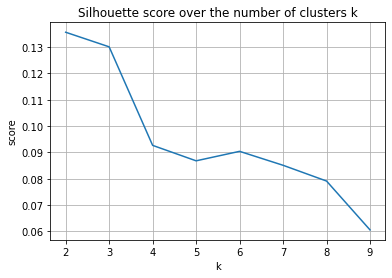

In [37]:
s_score = []
for n_clusters in tqdm(range(2, 10)): 
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(pred, sample_weight=weight_in_order)
    s_score.append(silhouette_score(pred, kmeans))

plt.plot(range(2,10), s_score)
plt.title('Silhouette score over the number of clusters k')
plt.xlabel('k')
plt.ylabel('score')
plt.grid()
plt.show()

_max = np.arange(2,10)[np.argmax(s_score)]

/home/under_ksh/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/under_ksh/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


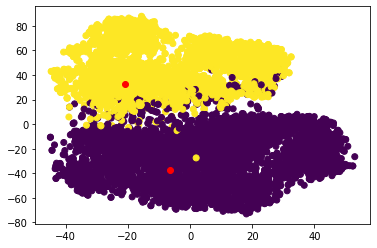

In [38]:
n = _max

kmeans = KMeans(n_clusters=n, random_state=0)
label = kmeans.fit_predict(pred, sample_weight=weight_in_order)

model = TSNE(n_components=2)
_pred = np.vstack((pred, kmeans.cluster_centers_))
transformed = model.fit_transform(_pred)

plt.scatter(transformed[:-n,0], transformed[:-n,1], c=label)
plt.scatter(transformed[-n:,0], transformed[-n:,1], c='red')

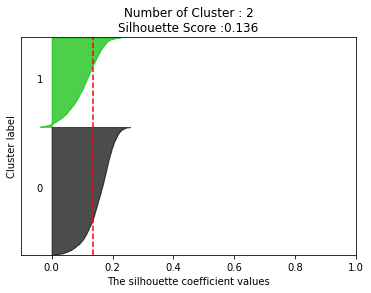

In [39]:
visualize_silhouette(pred , _max, weight_in_order)

In [40]:
pred = torch.load('73_pred1.pt').detach().numpy()

with open('/home/under_ksh/lxp32_project/dc/modfiles/id_map.json') as f:
    idmap = json.load(f)

with open('/home/under_ksh/lxp32_project/dc/modfiles/inst_area.json') as f:
    weight = json.load(f)

mem_removed = list(idmap.keys())
for i, cell in enumerate(idmap):    
    if 'sram' in cell:
        mem_removed.remove(cell)
        pred = np.delete(pred, i, axis=0)


weight_in_order = np.array([weight[cell] for cell in mem_removed], dtype=float)

100%|██████████| 8/8 [00:26<00:00,  3.31s/it]


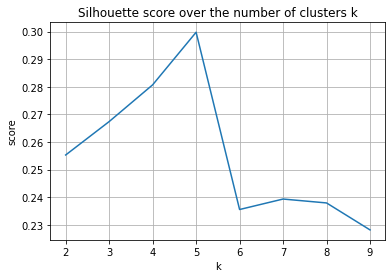

In [41]:
s_score = []
for n_clusters in tqdm(range(2, 10)): 
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(pred, sample_weight=weight_in_order)
    s_score.append(silhouette_score(pred, kmeans))

plt.plot(range(2,10), s_score)
plt.title('Silhouette score over the number of clusters k')
plt.xlabel('k')
plt.ylabel('score')
plt.grid()
plt.show()

_max = np.arange(2,10)[np.argmax(s_score)]

/home/under_ksh/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/under_ksh/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


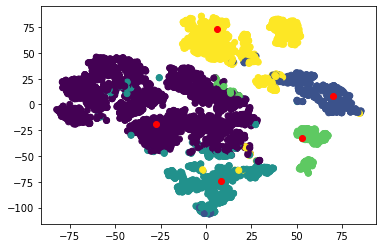

In [42]:
n = 5

kmeans = KMeans(n_clusters=n, random_state=0)
label = kmeans.fit_predict(pred, sample_weight=weight_in_order)

model = TSNE(n_components=2)
_pred = np.vstack((pred, kmeans.cluster_centers_))
transformed = model.fit_transform(_pred)

plt.scatter(transformed[:-n,0], transformed[:-n,1], c=label)
plt.scatter(transformed[-n:,0], transformed[-n:,1], c='red')

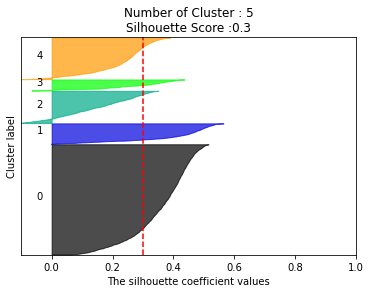

In [43]:
visualize_silhouette(pred, _max, weight_in_order)

In [44]:
pred = np.load('/home/under_ksh/lxp32_project/dc/modfiles/feature.npy', allow_pickle=True)

with open('/home/under_ksh/lxp32_project/dc/modfiles/id_map.json') as f:
    idmap = json.load(f)

with open('/home/under_ksh/lxp32_project/dc/modfiles/inst_area.json') as f:
    weight = json.load(f)

mem_removed = list(idmap.keys())
for i, cell in enumerate(idmap):    
    if 'sram' in cell:
        mem_removed.remove(cell)
        pred = np.delete(pred, i, axis=0)


weight_in_order = np.array([weight[cell] for cell in mem_removed], dtype=float)

100%|██████████| 8/8 [00:20<00:00,  2.59s/it]


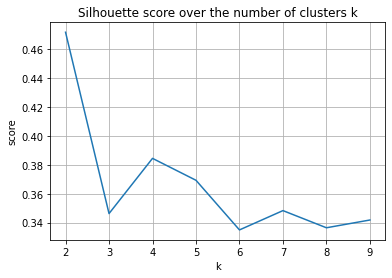

In [45]:
s_score = []
for n_clusters in tqdm(range(2, 10)): 
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(pred, sample_weight=weight_in_order)
    s_score.append(silhouette_score(pred, kmeans))

plt.plot(range(2,10), s_score)
plt.title('Silhouette score over the number of clusters k')
plt.xlabel('k')
plt.ylabel('score')
plt.grid()
plt.show()

_max = np.arange(2,10)[np.argmax(s_score)]

/home/under_ksh/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/under_ksh/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


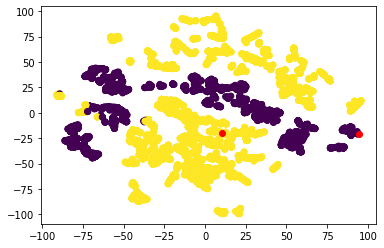

In [46]:
n = 2

kmeans = KMeans(n_clusters=n, random_state=0)
label = kmeans.fit_predict(pred, sample_weight=weight_in_order)

model = TSNE(n_components=2)
_pred = np.vstack((pred, kmeans.cluster_centers_))
transformed = model.fit_transform(_pred)

plt.scatter(transformed[:-n,0], transformed[:-n,1], c=label)
plt.scatter(transformed[-n:,0], transformed[-n:,1], c='red')

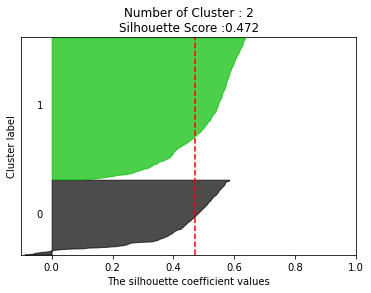

In [47]:
visualize_silhouette(pred, _max, weight_in_order)